In [1]:
using Revise
includet("shielding.jl")

#using .diatomic_jl.MoleculeTypes
using .shielding_jl
using PhysicalConstants.CODATA2018
a0 = BohrRadius.val

WebIO._IJuliaInit()

5.29177210903e-11

# Setting Up the Molecule

In [2]:
tester = generateMolecule(Na23Cs133, 3, 6)
H = generateHamiltonian(tester);

# Scanning Parameters

In [3]:
#Scanning Electric Field at high R making basis smaller for faster calculations
tester = generateMolecule(Na23Cs133, 3, 0)
H_Escan = generateHamiltonian(tester)

Escan = [2.365e5:1e2:2.37e5...]

sols_E = scan(H_Escan, 1e10, Escan);

In [ ]:
Eset = 2.65*1e5
#stateOI = State( [0.0, 0.0, 1.0, 1.0.0, 1.0, 1], H);
r_scan = [collect(100:40:500);collect(500:400:3000);collect(3000:1000:7000)].*a0
sols_R = scan(H, r_scan, Eset);

In [4]:
using JLD2
a = load("mytuple.jld2")
r_scan, sols_R = a["single_stored_object"];

## Plotting Utils

## Avoided Crossing from E-Field
### Demonstrates how you concatante plots with different states just pass in p

In [5]:
p = plotScan(H_Escan, sols_E, stateOI = [[0.0, 0.0], [0, 1.0], [0, 1.0]]) # stateOI = [[mL, L], [mN2, N2], [mN1, N1]]
p = plotScan(p, H_Escan, sols_E, stateOI = [[0.0, 0.0], [0, 2.0], [0, 0.0]])
p

data: [
  "scatter with fields name, text, type, x, and y",
  "scatter with fields name, text, type, x, and y"
]

layout: "layout with fields height, margin, plot_bgcolor, template, title, width, xaxis, and yaxis"

## Demonstrates plot from R scan 
### shows you how to change properties of the plot
### shows you how to include multiple L's

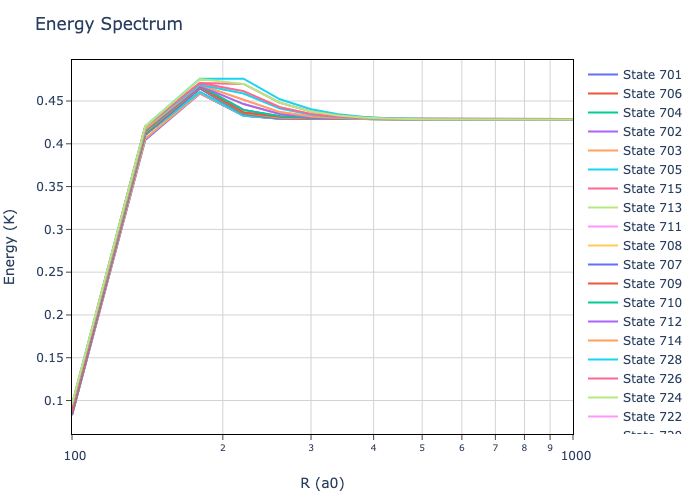

In [58]:
p = plotScan(H, sols_R, stateOI = [nothing, [0, 1.0], [0, 1.0]]) # stateOI = [[mL, L], [mN2, N2], [mN1, N1]]
relayout!(p, xaxis=attr(type= "log"), xaxis_range=[log10(100),log10(1000)])
p

# Extracting Data

In [7]:
energyVals = energies(sols_R)
stateOF = State([0, 0, 0, 1.0, 0, 1.0], H) #QM = [mL, L, mN2, N2, mN1, N1]
stateVec, adiabatOI = adiabats(sols_R, stateOF);

state: 701


# State searching Utils

In [8]:
stateOF = State([0, 0, 0, 1.0, 0, 1.0], H) #QM = [mL, L, mN2, N2, mN1, N1]
stateInd = findStateMax(stateOF, sols_R[end])

701